# FIT5196 Assessment 2
#### Student Name: Zhong Ying
#### Student ID: 27726185

Date: 06/05/2017

Version: 2.0

Environment: Python 3.5.2 and Anaconda 4.1.1 (64-bit)

Libraries used:
* json (for parsing json doc, included in Anaconda Python 3.5)
* matplotlib.pyplot (for graph, included in Anaconda Python 3.5) 
* re (for regular expression, included in Anaconda Python 3.5) 
* pandas.io.json (for normalize json file, included in Anaconda Python 3.5)
* pandas (for dataframe, included in Anaconda Python 3.5)
* LinearRegression (for fitting linear regression model, included in Anaconda Python 3.5)
* numpy (for treating null value, included in Anaconda Python 3.5)
* statsmodels.stats.stattools (for skewed outlier, included in Anaconda Python 3.5)



## 1. Introduction
This assignment consists of parsing the data stored in 'data.dat' file into the wanted formant and detecting all possible data anomaly in the data such as syntactical anomalies, sematic anomalies and coverage anomalies. In addition, appropriate solution dealing with errors need to be provided and justified in this assignment, the required tasks are the following:

1. Examine and load data into a dataframe.
2. Parse the loaded data so that each column has the required attribute name and proper type.
3. Audit and cleanse loaded data, including identify the data problems and fix the problems. .

More details for each task will be given in the following sections.

## 2. Import libraries

In [1]:
import json
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import re
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.stats.stattools as sm
import math
%matplotlib inline
plt.style.use( 'ggplot' )

## 3. Examining and loading data

Firstly, we inpect the data in the notepad, we found that the data is structured in the following pattern: 
```
{"houses": 
  [
   {
    "area": 
          {
           "sqft_basement": 0, 
           "sqft_above": 1340, 
           "sqft_living/sqft_lot": "sqft_living/sqft_lot=1340\\ 7912"
           },
    "yr_renovated": NaN, 
    "price": 313000.0, 
    "waterfront": 0,
    "floors": 1.5, 
    "rooms": "Number of bathrooms: 1.5; Number of bedrooms: 3", 
    "address": "18810 Densmore Ave N, Shoreline, WA 98133, USA", 
    "date": "20140502T000000", 
    "yr_built": 1955, "condition": 3,
    "view": 0
   }, 
   
   {
    "area": 
          {
           "sqft_basement": 
           ...
           },
    .....
    "date": , 
    "yr_built": ,
    "view": 
   }, 
....
....

  ]
```
From our observation above, each data record looks like a Python dictionary and the file contains a list of dictionaries, in which key-value pair for each row and the key and value are separated by a colon. These characteristics indicate that the file is in the format of json. So we can use the json.load function to load the data into a Python dictionary. 

The data that we want to convert to dataframe are a list of dictionaries stored as the values of the key "houses", since they are inner dictionaries embedded inside an outer dictionary, we can not directly use read_json to convert the dictionary into table, instead we need to extract the lables inside the list and flatten the list into a dataframe. What we are going to do is to use a JSON normalization function (json_normalize()) that takes a dict or list of dicts and normalize semi-structured data into a flat table. 

In [2]:
with open("./data.dat") as json_file:   
    json_data = json.load(json_file)  # load json file to python dictionary

In [3]:
df = json_normalize(json_data, 'houses')  # flatten the list to dataframe

## 4. Parse data into required format

Although we have loaded the data into a dataframe called df, the format of dataframe is not exactly what we want because some columns contain more than one attributes thus should be further split into single attributes. To be more specific, three columns need to be split,i.e. 'address' can break up into four new variabls: 'street','city', 'statezip'and 'country'; 'area' can be divided into four new variables: 'sqft_living','sqft_lot','sqft_above' and 'sqft_basement'; at last, 'rooms' can generate attributes of 'bathrooms' and 'bedrooms'. In the next step, we will extract the required information from the above-memtioned variables and assign them to a new column to make the dataframe more clear and simple.

In [4]:
pd.set_option('display.max_colwidth', 200)  # to adjust the column width of dataframe so all information can be displayed
print (len(df))
df.head()

4601


,address,area,condition,date,floors,price,rooms,view,waterfront,yr_built,yr_renovated
0,"18810 Densmore Ave N, Shoreline, WA 98133, USA","{'sqft_living/sqft_lot': 'sqft_living/sqft_lot=1340\ 7912', 'sqft_basement': 0, 'sqft_above': 1340}",3,20140502T000000,1.5,313000.0,Number of bathrooms: 1.5; Number of bedrooms: 3,0,0,1955,NaN
1,"709 W Blaine St, Seattle, WA 98119, USA","{'sqft_living/sqft_lot': 'sqft_living/sqft_lot=3650\ 9050', 'sqft_basement': 280, 'sqft_above': 3370}",5,20140502T000000,2.0,2384000.0,Number of bathrooms: 2.5; Number of bedrooms: 5,4,0,1921,NaN
2,"26206-26214 143rd Ave SE, Kent, WA 98042, USA","{'sqft_living/sqft_lot': 'sqft_living/sqft_lot=1930\ 11947', 'sqft_basement': 0, 'sqft_above': 1930}",4,20140502T000000,1.0,342000.0,Number of bathrooms: 2.0; Number of bedrooms: 3,0,0,1966,NaN
3,"857 170th Pl NE, Bellevue, WA 98008, USA","{'sqft_living/sqft_lot': 'sqft_living/sqft_lot=2000\ 8030', 'sqft_basement': 1000, 'sqft_above': 1000}",4,20140502T000000,1.0,420000.0,Number of bathrooms: 2.25; Number of bedrooms: 3,0,0,1963,NaN
4,"9105 170th Ave NE, Redmond, WA 98052, USA","{'sqft_living/sqft_lot': 'sqft_living/sqft_lot=1940\ 10500', 'sqft_basement': 800, 'sqft_above': 1140}",4,20140502T000000,1.0,550000.0,Number of bedrooms: 4; Number of bathrooms: 2.5,0,0,1976,NaN


Because the value of 'area' is a dictionary where 'sqft_basement', 'sqft_living/sqft_lot'and 'sqft_above' are three keys, the way to extract the value of 'sqft_basement' and 'sqft_above' is straightforward: simply use the dictionary look up method (dic[key]) to retrieve the value of 'sqft_above' and 'sqft_basement'. As for 'sqft_living' and 'sqft_lot', since they are under one key lable, regression expression are needed to find the two digital number standing for each variable, then assign them to 'sqft_living' and 'sqft_lot' respectively.


To execute the above process for each row, we use the apply function along with lambda.
By assigning the retrieved value to a new column, we can build new columns based on  information from the exsited column

In [5]:
df['sqft_above'] = df['area'].apply(lambda x : x['sqft_above'])  # extract sqft_above from area
df['sqft_basement'] = df['area'].apply(lambda x : x['sqft_basement'] ) # extract sqft_basement from area

In [6]:
# extract sqft_living from area
df['sqft_living'] = df['area'].apply(lambda x: re.findall(r"\d+",x['sqft_living/sqft_lot'])[0])
# extract sqft_lot from area
df['sqft_lot'] = df['area'].apply(lambda x: re.findall(r"\d+", x['sqft_living/sqft_lot'])[1])

The number of bathrooms and bedrooms are stored in the column of 'rooms' preceded by the strings of 'Number of bathrooms:' and 'Number of bedrooms'. To extract their values, we use re package to return the value matching the regex "Number of bathrooms: (\d+\.?\d\*)" and "Number of bedrooms: (\d+\.?\d\*)". Again we use the apply method and lambda to excute the operation to each row of variable 'rooms'.

In [7]:
# extract bathrooms from rooms
df['bathrooms'] = df['rooms'].apply( lambda x: re.findall(r"Number of bathrooms: (\d+\.?\d*)", x)[0])
# extract bedrooms from rooms
df['bedrooms'] = df['rooms'].apply( lambda x: re.findall(r"Number of bedrooms: (\d+\.?\d*)", x)[0] )

Because 'street',''city', 'statezip', 'country' are stored in sequence under the variable of address seperated by comma. To extract them, we can use the split method to put the four elements into a list and then use index to retrieve each value and assign it to corresponding columns. 

In [8]:
df['street'] = df['address'].apply( lambda x: [a.strip() for a in x.split(',')][0]) # extract street from address
df['city'] = df['address'].apply( lambda x: [a.strip() for a in x.split(',')][1] ) # extract city from address
df['statezip'] = df['address'].apply( lambda x: [a.strip() for a in x.split(',')][2] ) # extract statezip from address
df['country'] = df['address'].apply( lambda x: [a.strip() for a in x.split(',')][3] ) # extract country from address

Now that we have got all the columns containing single data attribute that we want, we can drop the multi-variable columns 

In [9]:
df = df.drop(['address', 'area', 'rooms'], axis = 1)

In [10]:
df.head()

,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,sqft_above,sqft_basement,sqft_living,sqft_lot,bathrooms,bedrooms,street,city,statezip,country
0,3,20140502T000000,1.5,313000.0,0,0,1955,NaN,1340,0,1340,7912,1.5,3,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5,20140502T000000,2.0,2384000.0,4,0,1921,NaN,3370,280,3650,9050,2.5,5,709 W Blaine St,Seattle,WA 98119,USA
2,4,20140502T000000,1.0,342000.0,0,0,1966,NaN,1930,0,1930,11947,2.0,3,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,4,20140502T000000,1.0,420000.0,0,0,1963,NaN,1000,1000,2000,8030,2.25,3,857 170th Pl NE,Bellevue,WA 98008,USA
4,4,20140502T000000,1.0,550000.0,0,0,1976,NaN,1140,800,1940,10500,2.5,4,9105 170th Ave NE,Redmond,WA 98052,USA


## 5 Convert data into correct type

To achieve the good performance of data analysis in the future, it is important to ensure that each data is in correct type, otherwise we will face difficulty when trying to do certain analysis on it. For example, if a numeric variable is stored as object type meaning it is treated as categorical variable, we can not do arithmatical operations on it, thus make it impossible for us to calculate its sum, mean or build certain models. With the function of info(), we can check the data type of our dataframe, which is shown below.

we notice that many variables are not in the correct format, mostly because the vaibles derived from complex variables of original json file are treated as string type. Based on the assumptions from assignment specification, we need to convert variables into the following type:

* int: condition, view, waterfront, bedrooms
* date: date, yr_built, yr_renovated
* float: floors, bathrooms
* string(object): street, city, statezip, country
* either be float or int depending on the data's precision: price, sqft_above, sqft_basement, sqft_living, sqft_lot,

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 18 columns):
condition        4601 non-null int64
date             4601 non-null object
floors           4601 non-null float64
price            4601 non-null float64
view             4601 non-null int64
waterfront       4601 non-null int64
yr_built         4601 non-null int64
yr_renovated     229 non-null float64
sqft_above       4601 non-null int64
sqft_basement    4601 non-null int64
sqft_living      4601 non-null object
sqft_lot         4601 non-null object
bathrooms        4601 non-null object
bedrooms         4601 non-null object
street           4601 non-null object
city             4601 non-null object
statezip         4601 non-null object
country          4601 non-null object
dtypes: float64(3), int64(6), object(9)
memory usage: 647.1+ KB


The convert_object function can convert variables which are made up of numbers but encoded as string to int or float type by specifing the keyword convert_numeric to True, in this way we change the data type of sqft_living, sqft_lot, bathrooms and bedrooms to int and float.

In [12]:
df1 = df.convert_objects(convert_numeric = True) # convert string variable to int or float
df1.dtypes

C:\Users\Zoe\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


condition          int64
date              object
floors           float64
price            float64
view               int64
waterfront         int64
yr_built           int64
yr_renovated     float64
sqft_above         int64
sqft_basement      int64
sqft_living        int64
sqft_lot           int64
bathrooms        float64
bedrooms           int64
street            object
city              object
statezip          object
country           object
dtype: object

In [13]:
df1.head()

,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,sqft_above,sqft_basement,sqft_living,sqft_lot,bathrooms,bedrooms,street,city,statezip,country
0,3,20140502T000000,1.5,313000.0,0,0,1955,NaN,1340,0,1340,7912,1.50,3,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5,20140502T000000,2.0,2384000.0,4,0,1921,NaN,3370,280,3650,9050,2.50,5,709 W Blaine St,Seattle,WA 98119,USA
2,4,20140502T000000,1.0,342000.0,0,0,1966,NaN,1930,0,1930,11947,2.00,3,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,4,20140502T000000,1.0,420000.0,0,0,1963,NaN,1000,1000,2000,8030,2.25,3,857 170th Pl NE,Bellevue,WA 98008,USA
4,4,20140502T000000,1.0,550000.0,0,0,1976,NaN,1140,800,1940,10500,2.50,4,9105 170th Ave NE,Redmond,WA 98052,USA


However, the data type of date, yr_renovated and yr_built remain to be string, we need to use to_datetime function to convert them to date. One thing worth noticing is that yr_renovated contains many nan values which is essentially a float type, as float type can not be transformed to date type, we need to convert them to int type first and replace the nan value with -1, after that it is available for to_datetime function to convert it. Those values of -1 will be coerced to nan during the execution of to_datetime because we adjust the keyword 'errors' to 'coerce'. We also specify the format of the variable in order to get the correct date element from values.

In [14]:
df1['yr_renovated'] = df1['yr_renovated'].fillna(value = -1) # replace the nan value of yr_renovated to -1

In [15]:
df1.loc[:,'yr_renovated'] = df1.loc[:,'yr_renovated'].astype(int)# convert yr_renovated to int

In [16]:
# convert variables regarding time to the date type
df1['date']  = pd.to_datetime(df1['date'], format = '%Y%m%dT%H%M%S', errors = 'coerce')
df1['yr_built'] = pd.to_datetime(df1['yr_built'], format = '%Y', errors = 'coerce')
df1['yr_renovated'] = pd.to_datetime(df1['yr_renovated'], format = '%Y', errors = 'coerce')
df1.dtypes

condition                 int64
date             datetime64[ns]
floors                  float64
price                   float64
view                      int64
waterfront                int64
yr_built         datetime64[ns]
yr_renovated     datetime64[ns]
sqft_above                int64
sqft_basement             int64
sqft_living               int64
sqft_lot                  int64
bathrooms               float64
bedrooms                  int64
street                   object
city                     object
statezip                 object
country                  object
dtype: object

We check the data type of table again, now we get all the variables in the wanted format.

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 18 columns):
condition        4601 non-null int64
date             4599 non-null datetime64[ns]
floors           4601 non-null float64
price            4601 non-null float64
view             4601 non-null int64
waterfront       4601 non-null int64
yr_built         4601 non-null datetime64[ns]
yr_renovated     229 non-null datetime64[ns]
sqft_above       4601 non-null int64
sqft_basement    4601 non-null int64
sqft_living      4601 non-null int64
sqft_lot         4601 non-null int64
bathrooms        4601 non-null float64
bedrooms         4601 non-null int64
street           4601 non-null object
city             4601 non-null object
statezip         4601 non-null object
country          4601 non-null object
dtypes: datetime64[ns](3), float64(3), int64(8), object(4)
memory usage: 647.1+ KB


## 6  Auditing and cleansing data

### 6.1 Syntactical Anomaly: Irregularity 

#### 6.1.1  abnormal values of date

After we convert the data type of 'date' to date, we found that two values are missing, they must be invalid date values so the to_datetime function coerced them to nan. To find out their original value, we find their index in the df1 table and use that index to identify their values in df table.

In [18]:
date_index = df1[pd.isnull(df1.date)].index  # find the index of nan value of date
df.ix[date_index]  # check the original value in df table

,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,sqft_above,sqft_basement,sqft_living,sqft_lot,bathrooms,bedrooms,street,city,statezip,country
4334,4,20140631T000000,1.0,248000.0,0,0,1954,NaN,950,0,950,9400,1.0,3,3920 153rd Ave SE,Bellevue,WA 98006,USA
4335,3,23052014T000000,2.0,505000.0,0,0,2002,NaN,1220,450,1670,1596,2.25,3,3019 30th Ave W,Seattle,WA 98199,USA


From the table above, it is easy to observe that the fisrt mistake is because the day is out of range of month, which can be corrected by changing the month to July or changing the day to 30, while the error of 4335 is possibly due to the reversal of the order of year, month and day, which can be corrected by placing these time value to right position.

In [19]:
date_1 = pd.to_datetime('20140630T000000',format = '%Y%m%dT%H%M%S') # convert the value for replacement the to date type
date_2 = pd.to_datetime('20140523T000000',format = '%Y%m%dT%H%M%S')

In [20]:
df1.ix[4334, 'date'] = date_1   # assign the right value to the incorrect date value
df1.ix[4335, 'date'] = date_2

#### 6.1.2 abnormal values of bathrooms

Discrete numerical variables need to be treated with carefulness because they must be within certain range based on our assumption, in other words values out of the range are to be regarded as invalid values. In the following step, let's check the unique values of all discrete numerical variables and see if they satisfy the following assumptions:

* values of bedrooms and waterfront should be integer
* view and condition should only have 5 unique integer values, ranging from 0 to 4 and 1 to 5 respectively
* values of bathrooms should be divisible by 0.25
* values of floors should be divisible by 0.5

In [21]:
print ('bedrooms unique values')
print ( df1.bedrooms.unique())
print ('bathrooms unique values')
print (df1.bathrooms.unique())
print ('view unique values')
print (df1.view.unique())
print ('floors unique values')
print (df1.floors.unique())
print ('waterfront unique values')
print (df1.waterfront.unique())
print ('condition unique values')
print (df1.condition.unique())

bedrooms unique values
[3 5 4 2 6 7 9 1 8 0]
bathrooms unique values
[ 1.5   2.5   2.    2.25  1.    1.75  2.75  3.    3.25  3.5   8.    4.25
  4.    3.75  5.    4.5   5.75  1.25  6.5   4.75  0.75  5.25  5.5   6.25
  0.    6.75  1.05  2.55  2.57  2.3   1.7 ]
view unique values
[0 4 1 2 3]
floors unique values
[ 1.5  2.   1.   2.5  3.   3.5]
waterfront unique values
[0 1]
condition unique values
[3 5 4 2 1]


As the above outcome displays, only bathrooms contains invalid values which are 1.05, 2.55, 2.57, 2.3, 1.7, in the following step, we are going to identify rows containing invalid values and replace them with the possible valid values which is close to the estimation of linear regression.

In [22]:
find_bath = df1['bathrooms']*100%25  # get the remainder of bathrooms times 100 divided by 25
find_index = find_bath[find_bath != 0].index # find the row index of bathrooms whose remainder is not zero
df1.ix[find_index] # check the rows which can't be divisible by 0.25

,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,sqft_above,sqft_basement,sqft_living,sqft_lot,bathrooms,bedrooms,street,city,statezip,country
4329,4,2014-05-06,1.0,518000.0,0,0,1956-01-01,NaT,1430,0,1430,8000,1.05,3,2527 154th Ave SE,Bellevue,WA 98007,USA
4330,4,2014-05-09,2.0,525000.0,0,0,1991-01-01,NaT,2030,0,2030,6970,2.55,3,3913 255th Pl SE,Issaquah,WA 98029,USA
4331,3,2014-06-24,2.0,236000.0,0,0,1997-01-01,NaT,2000,0,2000,5827,2.57,4,26546 236th Pl SE,Maple Valley,WA 98038,USA
4332,3,2014-06-10,2.0,278500.0,0,0,1990-01-01,NaT,1940,0,1940,6206,2.30,4,32900 19th Ave SW,Federal Way,WA 98023,USA
4333,4,2014-06-23,1.0,205425.0,0,0,1945-01-01,NaT,880,0,880,6780,1.70,2,11440 69th Pl S,Seattle,WA 98178,USA


Before we impute the values for the incorrect bathrooms, let's select varibles that is closely related to bathrooms so that can be used as independent variable in the regression model. By calculating the correlation matrix below, we find that the coeffient of sqft_living and bedrooms are relatively high (0.76 and 0.54 respectively), indicating that they are good candidates of predictor for bathrooms.

In [23]:
df1.corr().ix['bathrooms'] # calculate the coefficient of correlation of bathrooms and other numerical variables

condition       -0.120111
floors           0.486510
price            0.317932
view             0.211948
waterfront       0.076227
sqft_above       0.689906
sqft_basement    0.298007
sqft_living      0.760980
sqft_lot         0.107843
bathrooms        1.000000
bedrooms         0.545834
Name: bathrooms, dtype: float64

We include sqft_living and bedrooms in the regression model to predict the target variable bathrooms, the R-squared value indicates that the model can explain 59% variability of the model, which is fairly effective.

In [24]:
lm = LinearRegression()
X = df1.ix[:,['sqft_living','bedrooms']]  # take 'sqft_living' and 'bedrooms' as predictor in the model

In [25]:
lm.fit(X, df1.bathrooms)
print ('r-squared for this model = ', lm.score(X, df1.bathrooms)) # generate the r-squared for the model

r-squared for this model =  0.592535493667


The linear regression model predictes the required bathrooms values as follows, however they can not be directly used to replace the incorrect values, because they are not divisible by 0.25 either, but they can be regarded as an important reference to real value. Our strategy here is to find a value which is nearest to the predicted value and divisible by 0.25, use that to replace the wrong values.

In [26]:
lm.predict(X)[[4329,4330,4331,4332,4333]]  # predict the values of four invalid bathrooms

array([ 1.72118518,  2.05088748,  2.15880705,  2.12583682,  1.29455339])

In [27]:
df1.bathrooms.replace({1.05:1.75, 2.55: 2.25, 2.57:2.25, 2.30: 2.00, 1.70: 1.50}, inplace = True)
df1.ix[find_index]  # check if they have been replaced

,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,sqft_above,sqft_basement,sqft_living,sqft_lot,bathrooms,bedrooms,street,city,statezip,country
4329,4,2014-05-06,1.0,518000.0,0,0,1956-01-01,NaT,1430,0,1430,8000,1.75,3,2527 154th Ave SE,Bellevue,WA 98007,USA
4330,4,2014-05-09,2.0,525000.0,0,0,1991-01-01,NaT,2030,0,2030,6970,2.25,3,3913 255th Pl SE,Issaquah,WA 98029,USA
4331,3,2014-06-24,2.0,236000.0,0,0,1997-01-01,NaT,2000,0,2000,5827,2.25,4,26546 236th Pl SE,Maple Valley,WA 98038,USA
4332,3,2014-06-10,2.0,278500.0,0,0,1990-01-01,NaT,1940,0,1940,6206,2.00,4,32900 19th Ave SW,Federal Way,WA 98023,USA
4333,4,2014-06-23,1.0,205425.0,0,0,1945-01-01,NaT,880,0,880,6780,1.50,2,11440 69th Pl S,Seattle,WA 98178,USA


#### 6.1.3 abnormal values of price

In the statistics summary table, we find that the minimal value of price is zero, which is apparently unreasonable because this data is a property sales records, if a house is sold as zero price, it is not 'sold' but gave as a gift or inherited. These zero values are possibly missing values and should be treated as null rather than zero otherwise it will affect future analysis of data. For now, we will replace it with nan, and in later section, they will be imputed by linear regression model.

In [28]:
len(df1[df1.price == 0.0])

248

In [29]:
df1.price.replace(0.0, np.nan, inplace = True)

### 6.2 Syntactical Anomaly: Lexical error

Lexical errors mostly happen in variables represented by string values, as to our data, there are four string variables, which are street, city, statezip and country. As the country only has one value: USA, we only need to validate the other three variables. First, let's take a look at city. In the following step we print out all city values of our dataframe in alphabetical order, it turns out there are many spelling errors of city name, for example Seattle is mistakenly written as Seaattle, Seatle, SeaTac, in addition, some city names are repeatedly recorded because of the of mixed use of case. With the help of Wikipedia, we identify the wrong city names and replace them with correct ones.

In [30]:
for x in sorted(df1.city.unique()):   
    print (x)

Algona
Auburn
Auburnt
Beaux Arts Village
Belleview
Bellevue
Bellvue
Black Diamond
Bothell
Burien
Carnation
Clyde Hill
Coronation
Covington
Des Moines
Duvall
Enumclaw
Fall City
Federal Way
Inglewood-Finn Hill
Issaguah
Issaquah
Kenmore
Kent
Kirkland
Kirklund
Lake Forest Park
Maple Valley
Medina
Mercer Island
Milton
Newcastle
Normandy Park
North Bend
Pacific
Preston
Ravensdale
Redmond
Redmonde
Redmund
Renton
Samamish
Sammamish
SeaTac
Seaattle
Seatle
Seattle
Shoreline
Skykomish
Snogualmie
Snoqualmie
Snoqualmie Pass
Sureline
Tukwila
Vashon
Woodenville
Woodinville
Yarrow Point
auburn
redmond
sammamish
seattle


In [31]:
replace_dic = { 
    'Carnation':'Coronation',
    'Belleview':'Bellevue',
    'seattle':'Seattle',
    'Woodenville':'Woodinville',
    'Bellvue':'Bellevue',
    'Snogualmie':'Snoqualmie', 
    'Redmonde':'Redmond',
    'Samamish':'Sammamish', 
    'Redmund':'Redmond',
    'Seaattle': 'Seattle',
    'Seatle': 'Seattle', 
    'Issaguah':'Issaquah', 
    'redmond':'Redmond',
    'Auburnt':'Auburn',
    'Inglewood-Finn Hill':'Kirkland',
    'auburn':'Auburn', 
    'Sureline': 'Shoreline',
    'sammamish':'Sammamish',
    'Kirklund': 'Kirkland'} 
df1.city.replace(replace_dic, inplace = True)

With regard to statezip, we print out their conbination of city name to check if they are correct correspondent of city, by looking up city's statezip online, we find that these conbination are matched and should be seen as valid values.

In [32]:
grouped= df1.groupby('statezip').city.unique()
for k,v in grouped.items():
    print(k)
    print(v)

WA 98001
['Auburn' 'Algona' 'Federal Way']
WA 98002
['Auburn']
WA 98003
['Federal Way']
WA 98004
['Bellevue' 'Clyde Hill' 'Yarrow Point' 'Beaux Arts Village']
WA 98005
['Bellevue']
WA 98006
['Bellevue']
WA 98007
['Bellevue']
WA 98008
['Bellevue']
WA 98010
['Black Diamond']
WA 98011
['Bothell']
WA 98014
['Coronation']
WA 98019
['Duvall']
WA 98022
['Enumclaw']
WA 98023
['Federal Way']
WA 98024
['Fall City']
WA 98027
['Issaquah']
WA 98028
['Kenmore' 'Bothell']
WA 98029
['Issaquah']
WA 98030
['Kent']
WA 98031
['Kent']
WA 98032
['Kent']
WA 98033
['Kirkland']
WA 98034
['Kirkland']
WA 98038
['Maple Valley']
WA 98039
['Medina']
WA 98040
['Mercer Island']
WA 98042
['Kent' 'Covington']
WA 98045
['North Bend']
WA 98047
['Pacific']
WA 98050
['Preston']
WA 98051
['Ravensdale']
WA 98052
['Redmond']
WA 98053
['Redmond']
WA 98055
['Renton']
WA 98056
['Renton' 'Newcastle']
WA 98057
['Renton']
WA 98058
['Renton']
WA 98059
['Renton' 'Newcastle']
WA 98065
['Snoqualmie']
WA 98068
['Snoqualmie Pass']
WA 980

### 6.3 Semantic Anomaly: contradiction among sqft_living, sqft_above and sqft_basement

Semantic anomaly usually happens under three circumstances: 1) the integrity constraint is violated, 2) variables contradict with each other or 3) there are duplicated rows. To find the former two types of anomaly, we need to take care of the variables which have relationship with others. In this dataset, we should pay attention to the consistency among sqft_living, sqft_above and sqft_basement, as well as the consistency among date, yr_built and yr_renovated because these variables provide information for others. Based on the specification of assignment, we can propose two contraint rules:

* sqft_living equal to the sum of sqft_above and sqft_basement
* date should be after yr_renovated(when yr_renovated is not null), yr_renovated should be after yr_built

First, let's check the inconsistency among sqft_living, sqft_above and sqft_basement. From the observation below, we can infer that the error of record 4338 is possibly caused by forgeting to take sqft_basement into account when calculating sqft_living so we can correct it by adding the sqft_basement to sqft_living. As for the mistake of record 4339, the value of sqft_living is larger than the sum of above and basement, it is safe to deduct that the sqft_basement value may be lost so we just fill in it with the difference between the other two variables.

In [33]:
incon_index = df1[df1['sqft_living'] != (df1['sqft_above'] + df1['sqft_basement'])].index # get the index of inconsistent record
df1.ix[incon_index]

,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,sqft_above,sqft_basement,sqft_living,sqft_lot,bathrooms,bedrooms,street,city,statezip,country
4338,3,2014-07-10,2.0,670000.0,0,0,2003-01-01,NaT,1280,1420,1280,1438,2.5,3,746 Boylston Ave E,Seattle,WA 98102,USA
4339,4,2014-07-01,1.0,202000.0,0,0,1926-01-01,NaT,590,0,890,833,1.0,1,701-711 26th Ave,Seattle,WA 98122,USA


In [34]:
df1.ix[4338,'sqft_living'] = 2700
df1.ix[4339,'sqft_basement'] = 300
df1.ix[incon_index]

,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,sqft_above,sqft_basement,sqft_living,sqft_lot,bathrooms,bedrooms,street,city,statezip,country
4338,3,2014-07-10,2.0,670000.0,0,0,2003-01-01,NaT,1280,1420,2700,1438,2.5,3,746 Boylston Ave E,Seattle,WA 98102,USA
4339,4,2014-07-01,1.0,202000.0,0,0,1926-01-01,NaT,590,300,890,833,1.0,1,701-711 26th Ave,Seattle,WA 98122,USA


### 6.4 Semantic Anomaly: Invalid values of yr_built and yr_renovated

Now let's look at variables regarding date to see if there is time inconsistency between them. First we write a function to compare the values of date, yr_built and yr_renavated of a single row. The function's basic idea is as follows: when these three variables are not null, the function will return true if yr_renovated is prior to date and yr_built is prior to yr_renovated, otherwise return false; when one variable is missing, if the other two still follow the sequence of time, the function will return true, otherwise return false. With the apply function, we can use this compare_date function to each row of dataframe and identify rows (i.e. 4340, 4341, 4342, 4345) violating time consistency: their yr_renovated is pror to yr_built.

In [35]:
def compare_date( row ):
    if (pd.notnull( row['yr_renovated'] )) & (pd.notnull( row['date'] ) ):
        if (row['yr_built'] < row['yr_renovated']) & (row['yr_renovated'] < row['date']):
            return True
        return False
    elif (row['yr_built'] <  row['date']) | (pd.isnull(row['yr_renovated']) & pd.isnull(row['date'])):
        return True
    return False

In [36]:
find_incon =  df1.apply(compare_date, axis = 1)  # generate a series containing boolean values
find_index = find_incon[find_incon == False].index  # get the index of invalid record
df1.ix[find_index]

,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,sqft_above,sqft_basement,sqft_living,sqft_lot,bathrooms,bedrooms,street,city,statezip,country
4340,3,2014-05-02,1.0,440000.0,0,0,1966-01-01,1913-01-01,1080,1080,2160,8119,2.25,4,12211 SE 65th St,Bellevue,WA 98006,USA
4341,3,2014-05-26,2.0,690000.0,0,0,2004-01-01,2003-01-01,2700,0,2700,8810,2.50,4,11659 168th Ct NE,Redmond,WA 98052,USA
4342,3,2014-05-08,2.0,375000.0,0,0,2012-01-01,1912-01-01,3206,0,3206,5793,2.25,6,25921-25929 35th Pl S,Kent,WA 98032,USA
4345,3,2014-05-22,2.0,850000.0,4,0,2013-01-01,1923-01-01,3090,0,3090,6744,3.25,4,19117-19123 Richmond Beach Dr NW,Shoreline,WA 98177,USA


The way we are going to fix this problem is to swap the values of yr_built and yr_renovated

In [37]:
yr_renovated = df1.ix[find_index,'yr_built']
df1.ix[find_index,'yr_built'] = df1.ix[find_index,'yr_renovated']
df1.ix[find_index,'yr_renovated'] = yr_renovated
df1.ix[find_index]

,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,sqft_above,sqft_basement,sqft_living,sqft_lot,bathrooms,bedrooms,street,city,statezip,country
4340,3,2014-05-02,1.0,440000.0,0,0,1913-01-01,1966-01-01,1080,1080,2160,8119,2.25,4,12211 SE 65th St,Bellevue,WA 98006,USA
4341,3,2014-05-26,2.0,690000.0,0,0,2003-01-01,2004-01-01,2700,0,2700,8810,2.50,4,11659 168th Ct NE,Redmond,WA 98052,USA
4342,3,2014-05-08,2.0,375000.0,0,0,1912-01-01,2012-01-01,3206,0,3206,5793,2.25,6,25921-25929 35th Pl S,Kent,WA 98032,USA
4345,3,2014-05-22,2.0,850000.0,4,0,1923-01-01,2013-01-01,3090,0,3090,6744,3.25,4,19117-19123 Richmond Beach Dr NW,Shoreline,WA 98177,USA


### 6.5 Semantic Anomaly: Duplicates

Duplicates bring redundancy to the data and may influence the distribution of data by adding more weight to certain value, thus we need to remove them. In our dataset, as there is no specific primary key to determine the uniqueness of rows, we decide that rows are duplicates if all their information are matched because no partial conbination of variables can identify each row. Below we find that two records share exactly same information which means they are duplicates.

In [38]:
df1[df1.duplicated( keep = False)]

,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,sqft_above,sqft_basement,sqft_living,sqft_lot,bathrooms,bedrooms,street,city,statezip,country
4336,3,2014-05-22,2.0,657500.0,0,0,1989-01-01,NaT,2670,0,2670,10496,2.5,3,1917 235th Ct NE,Sammamish,WA 98074,USA
4337,3,2014-05-22,2.0,657500.0,0,0,1989-01-01,NaT,2670,0,2670,10496,2.5,3,1917 235th Ct NE,Sammamish,WA 98074,USA


After finding them, we remve the second record and reset the index so that the index 4337 will be assigned to the next valid record.

In [39]:
df1.drop(4337, inplace = True)

In [40]:
df1.reset_index(drop= True, inplace = True)

### 6.6 Outlier

Outlier is the anomalous entry which is outside the normal behaviour of the majority of data. There are two types of outlier, namely univariate outlier and multivariate outlier, the former can be regarded as the extreme value of a variable and does not conform to a regular distribution of the normal obeserved data, while for multivariate outlier, it is the case with an unusual combination of scores on different variables and not necessarily extreme with respect to any of their individual component values but with respect to the attributes grouped together. Different ways can be applied to the two types of outlier, generally speaking, when treating with univariate outlier from a symmetrically distributed dataset, we can use 3 sd rule, MAD and control chart to detect outliers, also boxplot is a common graphical method that has an advantage of robustness against outliers because it the usage of quartiles. As for multivariate outliers, model-based ways are needed and scatterplot can be very intuitive to detect outliers.

In the following section, we are going to check the distribution of our continous numerical variables first to have a sense of what the data look like, then we will inspect univariate outliers for each variable, at last we will calculate the correlation matrix between variables to see which two variables are closely related and find the possible multivariate outliers based on models.


In the statistics summary table of numeric variables, we can see that there are 5 continous numerical variables needing to check for outliers, which are price, sqft_living, sqft_above, sqft_basement and sqft_lot. Let's draw the histogram to see how they are distributed. 

In [41]:
df1.describe()

C:\Users\Zoe\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,condition,floors,price,view,waterfront,sqft_above,sqft_basement,sqft_living,sqft_lot,bathrooms,bedrooms
count,4600.000000,4600.000000,4.352000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000
mean,3.451739,1.512065,5.649557e+05,0.240652,0.007174,1827.265435,312.146739,2139.412174,1.485252e+04,2.160598,3.400870
std,0.677230,0.538288,5.728973e+05,0.778405,0.084404,862.168977,464.114443,963.112140,3.588444e+04,0.783722,0.908848
min,1.000000,1.000000,7.800000e+03,0.000000,0.000000,370.000000,0.000000,370.000000,6.380000e+02,0.000000,0.000000
25%,3.000000,1.000000,NaN,0.000000,0.000000,1190.000000,0.000000,1460.000000,5.000750e+03,1.750000,3.000000
50%,3.000000,1.500000,NaN,0.000000,0.000000,1590.000000,0.000000,1980.000000,7.683000e+03,2.250000,3.000000
75%,4.000000,2.000000,NaN,0.000000,0.000000,2300.000000,610.000000,2620.000000,1.100125e+04,2.500000,4.000000
max,5.000000,3.500000,2.659000e+07,4.000000,1.000000,9410.000000,4820.000000,13540.000000,1.074218e+06,8.000000,9.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E8AE3BD4E0>]], dtype=object)

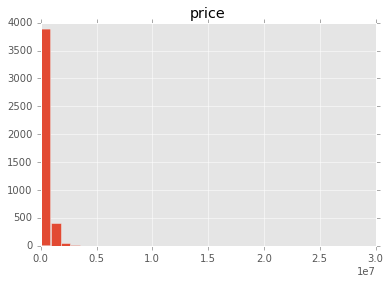

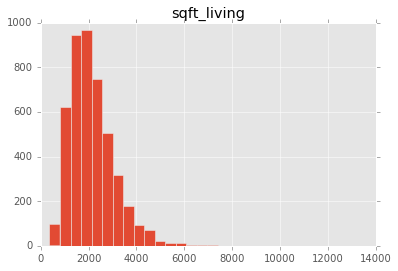

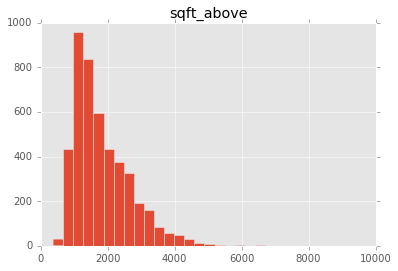

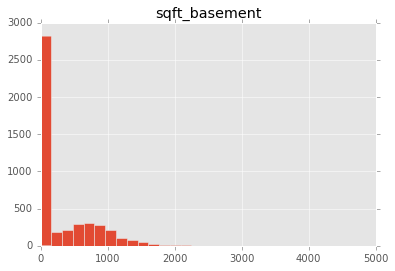

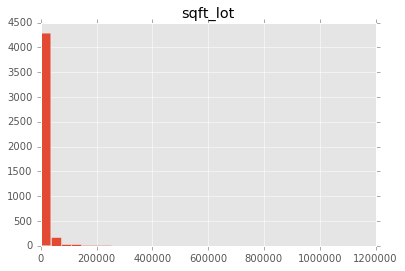

In [42]:
df1.hist('price', bins = 30)
df1.hist('sqft_living', bins = 30)
df1.hist('sqft_above', bins = 30)
df1.hist('sqft_basement', bins = 30)
df1.hist('sqft_lot', bins = 30)

#### 6.6.1 Univariate outlier 

As we can see from above graphs, these five variables are highly skewed data thus general way of treating univariate outlier such as boxplot, 3 sd rule, MAD will not work on them. To address this problem, we will introduce an outlier detection method for skewed univariate data which takes skewness into account to calculate the adjusted outlyingness. This solution is provided by Mia Hubert(2007). The boundary pr so-called whiskers are adjusted such that for skewed data, much less regular data points fall outside the whiskers. This is obtained by replacing the interval into [Q1 − 3exp(−4MC)\* IQR , Q3 + 3exp(3MC)\*IQR],in which MC stands for the medcouple which is a robust measure of skewness.  

Below is the function to dectect the outlier of skewed data, it takes on two paramters which are a single column and multiplicator of whisker, it will return the upper and lower boundary of a variable, values out of this boundary are suspicious outliers. With the help of online property resources such as website [Redfin](https://www.redfin.com/) , we can verify the correctness of the data.

In [43]:
def skewed_outlier( column , times):
    col = [float(i) for i in column]
    mc = float(sm.medcouple(col))
    whi_1 = times*math.exp(-4*mc)
    whi_2 = times*math.exp(3*mc)
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    return [ q1-whi_1*IQR, q3+whi_2*IQR]

In [44]:
# check for outliers of sqft_living
# one suspicious outlier is detected
# but after verifying its information on the online property agent website Redfin, it is a valid value
df1.loc[ (df1.sqft_living < skewed_outlier(df1.sqft_living, 3)[0])  | (df1.sqft_living > skewed_outlier(df1.sqft_living, 3)[1]) ]

,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,sqft_above,sqft_basement,sqft_living,sqft_lot,bathrooms,bedrooms,street,city,statezip,country
122,3,2014-05-05,3.0,2280000.0,4,0,1999-01-01,NaT,9410,4130,13540,307752,8.00,7,26408 NE 70th St,Redmond,WA 98053,USA
2286,3,2014-06-11,2.0,7062500.0,2,1,1940-01-01,2001-01-01,7680,2360,10040,37325,4.50,5,4442 95th Ave NE,Bellevue,WA 98004,USA
2328,3,2014-06-11,2.0,2888000.0,4,0,1965-01-01,2003-01-01,6120,2550,8670,64033,6.25,5,1291 NW Elford Dr,Seattle,WA 98177,USA
2654,3,2014-06-17,1.0,4668000.0,4,1,1983-01-01,2009-01-01,4820,4820,9640,13068,6.75,5,5044 Butterworth Rd,Mercer Island,WA 98040,USA


In [45]:
# check for outliers of sqft_above
# no suspicious outlier is detected
df1.loc[ (df1.sqft_above < skewed_outlier(df1.sqft_above, 3)[0])  | (df1.sqft_above > skewed_outlier(df1.sqft_above, 3)[1]) ]

,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,sqft_above,sqft_basement,sqft_living,sqft_lot,bathrooms,bedrooms,street,city,statezip,country


In [46]:
# check for outliers of sqft_basement
# two suspicious outliers are detected
# but after verifying its information on the online property agent website Redfin, they are valid values
df1.loc[ (df1.sqft_basement < skewed_outlier(df1.sqft_basement, 5)[0])  | (df1.sqft_basement > skewed_outlier(df1.sqft_basement, 5)[1]) ]

,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,sqft_above,sqft_basement,sqft_living,sqft_lot,bathrooms,bedrooms,street,city,statezip,country
122,3,2014-05-05,3.0,2280000.0,4,0,1999-01-01,NaT,9410,4130,13540,307752,8.00,7,26408 NE 70th St,Redmond,WA 98053,USA
2654,3,2014-06-17,1.0,4668000.0,4,1,1983-01-01,2009-01-01,4820,4820,9640,13068,6.75,5,5044 Butterworth Rd,Mercer Island,WA 98040,USA


Below we check for outliers of sqft_basement and four suspicious outliers are detected, by verifying their information on Redfin website, we find that **index 4346 and 4350 are outliers**, they have extra zero compared with their true value. So we fix them by replacing them with their real values.

In [47]:
df_price = df1[pd.notnull(df1.price)].price  # price with not null values
df1.loc[ (df1.price < skewed_outlier(df_price, 6)[0])  | (df1.price > skewed_outlier(df_price, 6)[1]) ]

,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,sqft_above,sqft_basement,sqft_living,sqft_lot,bathrooms,bedrooms,street,city,statezip,country
2286,3,2014-06-11,2.0,7062500.0,2,1,1940-01-01,2001-01-01,7680,2360,10040,37325,4.50,5,4442 95th Ave NE,Bellevue,WA 98004,USA
2654,3,2014-06-17,1.0,4668000.0,4,1,1983-01-01,2009-01-01,4820,4820,9640,13068,6.75,5,5044 Butterworth Rd,Mercer Island,WA 98040,USA
4346,3,2014-06-23,1.0,12899000.0,0,0,1956-01-01,NaT,1550,640,2190,11394,2.50,3,5426 40th Ave W,Seattle,WA 98199,USA
4350,4,2014-07-03,1.0,26590000.0,0,0,1992-01-01,NaT,1180,0,1180,7793,2.00,3,12005 SE 219th Ct,Kent,WA 98031,USA


In [48]:
df1.price.replace({12899000.0:1289000}, inplace = True) 
df1.price.replace({26590000.0:265900}, inplace = True)

#### 6.6.2 Multivariate outlier

To detect multivariate outliers, we need to find the variables closely related to each other, based on which we can draw the scatter plot of two variables and find the outlier far away from the overall trend. From the correlation matrix below, we can see that price has a moderate relation with sqft_living, and bathrooms is closely related to sqft_living and sqft_above. In the next step, we are going to use scatterplot to identify outliers.

In [49]:
df1.corr()[['price','sqft_living','sqft_above','sqft_basement','sqft_lot']]

,price,sqft_living,sqft_above,sqft_basement,sqft_lot
condition,0.052644,-0.062777,-0.178196,0.200756,0.000558
floors,0.255204,0.344820,0.522814,-0.255656,0.003750
price,1.000000,0.708970,0.607852,0.344356,0.086630
view,0.389262,0.311019,0.174327,0.321574,0.073907
waterfront,0.237766,0.117622,0.078911,0.097494,0.017241
sqft_above,0.607852,0.876432,1.000000,-0.038927,0.216455
sqft_basement,0.344356,0.447044,-0.038927,1.000000,0.034789
sqft_living,0.708970,1.000000,0.876432,0.447044,0.210533
sqft_lot,0.086630,0.210533,0.216455,0.034789,1.000000
bathrooms,0.525258,0.761268,0.689962,0.298036,0.107915


From the graph below we can see that 3 points are distinct from the ovarall pattern, their prices are near $2000000, however their sqft_living values are either extremely high or relatively low, they can be seen as suspicous outliers.

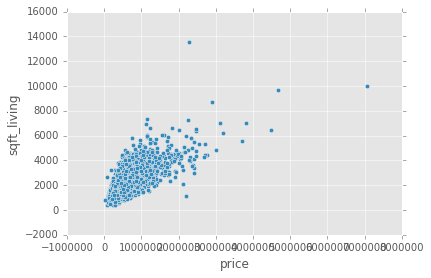

In [50]:
fig, ax = plt.subplots()
df1.plot('price', 'sqft_living', kind='scatter', ax=ax)
fig.canvas.draw()

In [51]:
df1.loc[ ((df1.price > 2000000) & (df1.sqft_living < 2200)) | (df1.sqft_living > 12000)]

,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,sqft_above,sqft_basement,sqft_living,sqft_lot,bathrooms,bedrooms,street,city,statezip,country
122,3,2014-05-05,3.0,2280000.0,4,0,1999-01-01,NaT,9410,4130,13540,307752,8.0,7,26408 NE 70th St,Redmond,WA 98053,USA
4347,3,2014-05-08,1.0,2110000.0,0,0,1959-01-01,NaT,1050,1050,2100,9200,1.0,4,14070 Military Rd S,Tukwila,WA 98168,USA
4348,3,2014-05-05,1.0,2199900.0,0,0,1969-01-01,2014-01-01,1120,0,1120,5427,1.5,4,19009-19021 SE 266th St,Covington,WA 98042,USA


After verifying their information on Redfin website, we find that index **4347 and 4348 are outliers**, they have extra zero compared with their true value. So we fix them by replacing them with their real values.

In [52]:
df1.price.replace({2110000.0:211000},inplace = True)
df1.price.replace({2199900.0:219900},inplace = True)

### 6.7 Inpute missing values

The missing values of price inhibits the data collection from being a comprehensive representation of the mini-world. To address this problem, we are going to use linear regression to impute the values for price. Based on the correlation matrix, we can find that view, bathrooms and sqft_living are moderately related to price, we will use these three variables are independent variables to predict the target variable price.

In [53]:
lm = LinearRegression()
X = df1.ix[pd.notnull(df1.price),['sqft_living','bathrooms', 'view']] 
# use 'sqft_living','bathrooms', 'view' as predictor
Y = df1[pd.notnull(df1.price)].price 
lm.fit(X, Y)
print ('r-squared for this model = ', lm.score(X, Y)) # generate the r-squared for the model

r-squared for this model =  0.541383361814


In [54]:
null_price = df1.ix[pd.isnull(df1.price),['sqft_living','bathrooms', 'view']]
lm.predict(null_price)  # predict the price of null values
df1.loc[pd.isnull(df1.price), 'price'] = lm.predict(null_price)

## 7 Data formatting 

In [55]:
df2 = df1.copy(deep = True)
# extract date values as string type from yr_built, yr_renovated, date
# if the value is na, set it as blank
df2['yr_built'] = [d.strftime('%Y') if not pd.isnull(d) else '' for d in df1['yr_built']]
df2['yr_renovated'] = [d.strftime('%Y') if not pd.isnull(d) else '' for d in df1['yr_renovated']]
df2['date'] = [d.strftime('%Y%m%dT%H%M%S') if not pd.isnull(d) else '' for d in df1['date']]

In [56]:
# write to csv file
df2.to_csv('Zhong_27726185_ass2_data.csv', index = False)

## 8 Conclusion

This assessment measured the understanding of basic data auditing and cleansing techniques in the Python programming language. The main outcomes achieved while applying these techniques were:

** parse and load json file ** with the help of json library and pandas.io module, we are able to load json file to the dataframe format and make preparations for data cleaning.

** convert date to correct format ** by using convert_object function and to_datetime function, we can transform the string type to the numerical type or date type. During the execution of conversion, we need to be aware of how to handle the exceptions, we can set the keyword coerce to error to avoid that.

** check syntactic errors ** syntactic correctness require us to pay attention to the value of variables to see if they are spelled correctly, within valid boundary or make sense. We can use the unique() method to inspect distinct values.

** check semantic errors ** semantic correctness require us to be aware of the relationship between variables, especially the integrity consistency, contradiction and duplication. To address these types of errors, we have to propose assumptions according to the context of our data.

** use graphical tool to explore dataset ** graphical tool can be very useful in many aspects, for example histogram can help us have a general idea of the distribution of data and boxplot can be used to detect univariate outlier, further more, scatterplot is intuitive for us to find relationship between variables and detect outlier of a model. 


## 9 Reference

- The 'pandas' project(2017) *pandas 0.20.1 documentation: options and settings*. Retrieved from http://pandas.pydata.org/pandas-docs/stable/options.html
- Wes(2012) *Keeping array type as integer while having a NaN value*. Retrieved from http://stackoverflow.com/questions/11548005/numpy-or-pandas-keeping-array-type-as-integer-while-having-a-nan-value
- Mia Huberta,Stephan Van der Veeken (2007, September 10). *Outlier detection for skewed data*. Retrieved from https://www.researchgate.net/publication/228375797_Outlier_detection_for_skewed_dat
- StatsModels(2017) *medcouple*. Retrieved from http://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.medcouple.html
- Redfin(2017) *check for house price*. Retrieved from https://www.redfin.com/WA/Seattle/5422-39th-Ave-W-98199/home/123010 
- Redfin(2017) *check for house price*. Retrieved from https://www.redfin.com/WA/Kent/12005-SE-219th-Ct-98031/home/222569
- Redfin(2017) *check for house price*. Retrieved from https://www.redfin.com/WA/Tukwila/14070-Military-Rd-S-98168/home/191907 
- Redfin(2017) *check for house price*. Retrieved from https://www.redfin.com/WA/Covington/19031-SE-266th-St-98042/home/371953